<a href="https://colab.research.google.com/github/saad-bin-farooq/ClassTask/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import tensorflow as tf

In [ ]:
!unzip -q data.zip

In [ ]:
import os

# Load and preprocess the data
data = []  # List to store image data
labels = []  # List to store labels

# Define a function to extract the person label from the file name
def extract_person_label(file_name):
    return int(file_name.split('.')[0].replace('subject', '')) - 1  # Subtract 1 to make labels start from 0

# Load data and labels
# Assuming the dataset files are in the 'dataset' directory
dataset_dir = 'data'

for file_name in os.listdir(dataset_dir):
    img = plt.imread(os.path.join(dataset_dir, file_name))
    # print(img.shape)
    data.append(img.flatten())  # Flatten image into a 1D array
    labels.append(extract_person_label(file_name))

data = np.array(data)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

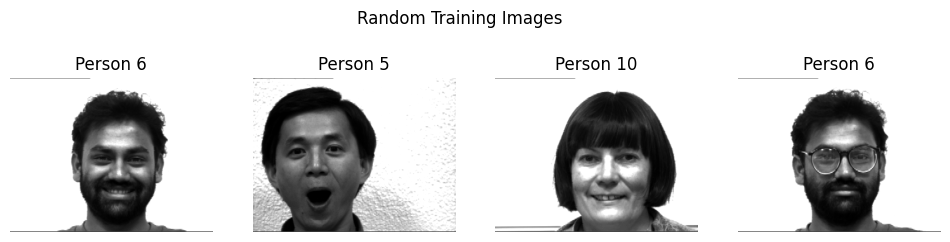

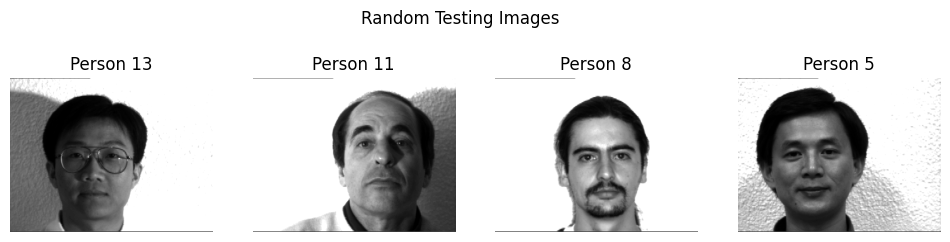

In [ ]:


import random

# Randomly select four indices from the training dataset
train_indices = random.sample(range(len(X_train)), 4)

# Randomly select four indices from the testing dataset
test_indices = random.sample(range(len(X_test)), 4)

# Function to display images
def display_images(images, labels, title):
    plt.figure(figsize=(12, 3))
    plt.suptitle(title)
    for i, (image, label) in enumerate(zip(images, labels), 1):
        plt.subplot(1, 4, i)
        plt.imshow(image.reshape((243, 320)), cmap='gray')
        plt.title(f"Person {label}")
        plt.axis('off')
    plt.show()

# Display four random training images
train_images_to_display = X_train[train_indices]
train_labels_to_display = y_train[train_indices]
display_images(train_images_to_display, train_labels_to_display, "Random Training Images")

# Display four random testing images
test_images_to_display = X_test[test_indices]
test_labels_to_display = y_test[test_indices]
display_images(test_images_to_display, test_labels_to_display, "Random Testing Images")

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, categories='auto')
y_train = np.array(y_train).reshape(-1, 1)
y_train = encoder.fit_transform(y_train)
y_test = np.array(y_test).reshape(-1,1)
y_test = encoder.transform(y_test)
X_train = X_train / 255.0
X_test = X_test / 255.0

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
input = tf.keras.layers.Input(shape = (X_train.shape[1]))
x = tf.keras.layers.Dense(1024, activation = 'relu')(input)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(15, activation = 'softmax')(x)

model = tf.keras.Model(inputs = input, outputs = x)


In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_split = 0.1, epochs = 20, batch_size = 32)

Epoch 1/20
4/4 [==============================] - 10s 3s/step - loss: 215.1706 - accuracy: 0.0424 - val_loss: 110.3449 - val_accuracy: 0.0714
Epoch 2/20
4/4 [==============================] - 14s 4s/step - loss: 185.8511 - accuracy: 0.0932 - val_loss: 130.6559 - val_accuracy: 0.1429
Epoch 3/20
4/4 [==============================] - 12s 2s/step - loss: 143.7230 - accuracy: 0.1271 - val_loss: 55.6758 - val_accuracy: 0.2857
Epoch 4/20
4/4 [==============================] - 6s 1s/step - loss: 57.7926 - accuracy: 0.0847 - val_loss: 27.5685 - val_accuracy: 0.0714
Epoch 5/20
4/4 [==============================] - 7s 2s/step - loss: 22.0099 - accuracy: 0.1695 - val_loss: 19.1417 - val_accuracy: 0.0000e+00
Epoch 6/20
4/4 [==============================] - 6s 1s/step - loss: 13.1677 - accuracy: 0.3051 - val_loss: 16.9575 - val_accuracy: 0.2143
Epoch 7/20
4/4 [==============================] - 7s 2s/step - loss: 9.9174 - accuracy: 0.3390 - val_loss: 6.0132 - val_accuracy: 0.3571
Epoch 8/20
4/4 [=

In [ ]:
from sklearn.metrics import accuracy

y_preds = model.predict(X_test)
print(accuracy(y_test, y_preds))